**Problem 4 (Mott 7-43)**

Select a synchronous belt drive system for Problem 3a (Mott7-19) above. For this application you can decrease the nominal output speed to 700 rpm.
DriveR: AC Motor (Normal Torque)       Speed = 1750rpm        Input Power = 5 HP
DriveN: Fan    Speed  = 700 rpm (nominal)           Service  = 22 hours/day



In [3]:
n_1 = 1750 # rpm
n_2 = 700 # rpm

H_in = 5 # hp

VR_nom = n_1 / n_2
print(VR_nom)

2.5


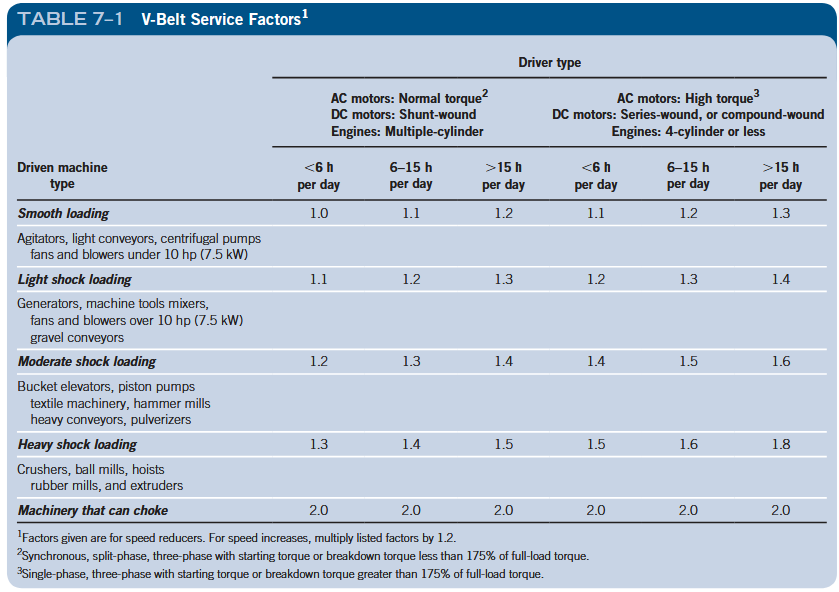
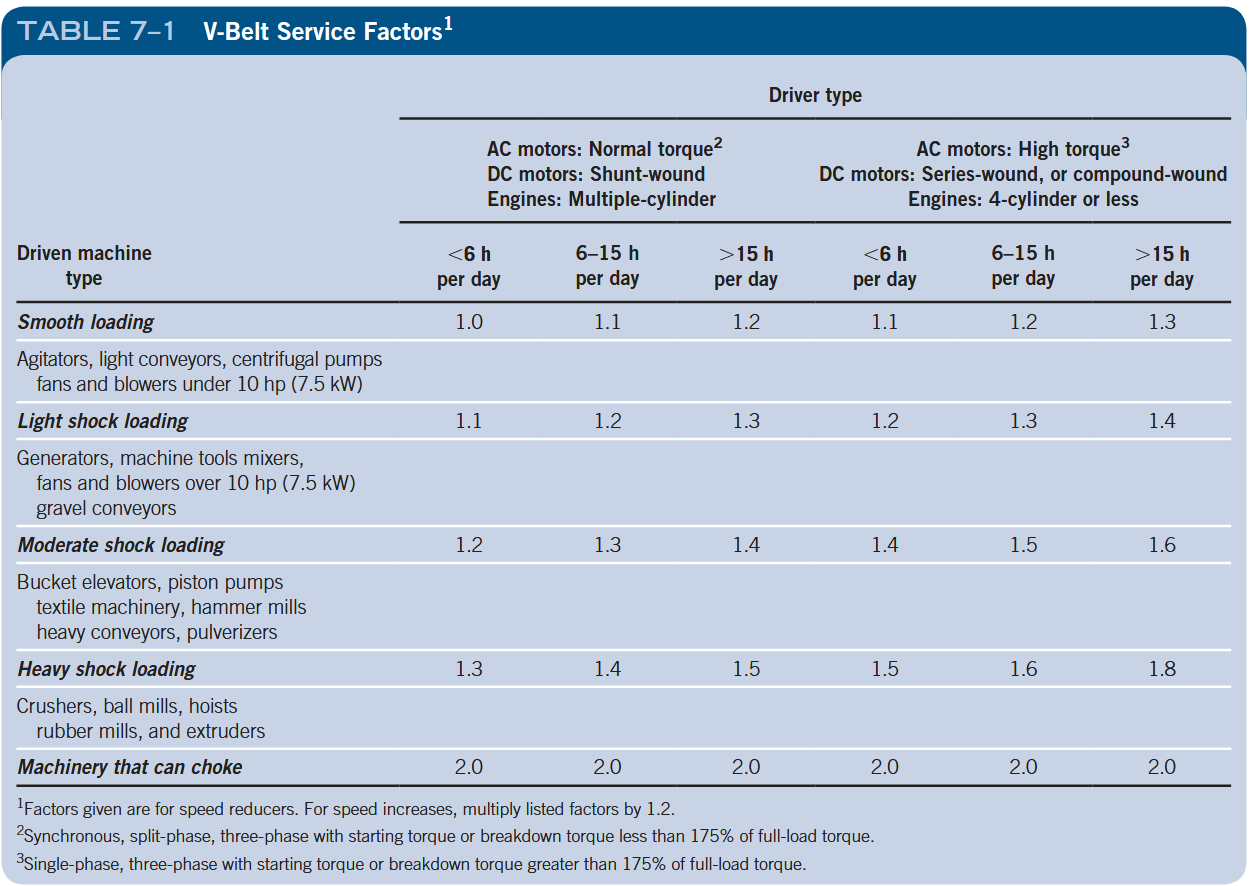

In [4]:
# T7-1: Smooth loading, >15h/day
K_s = 1.3
H_des = H_in * K_s
print(H_des)

6.5


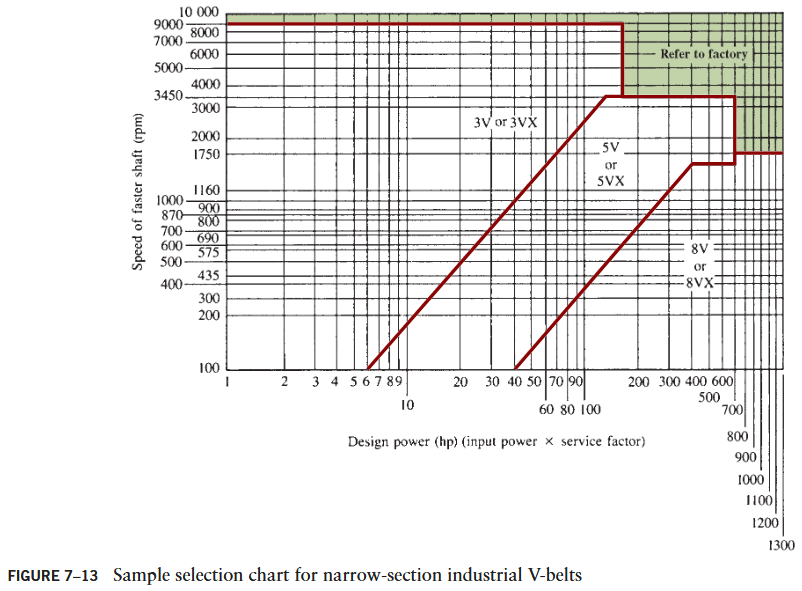
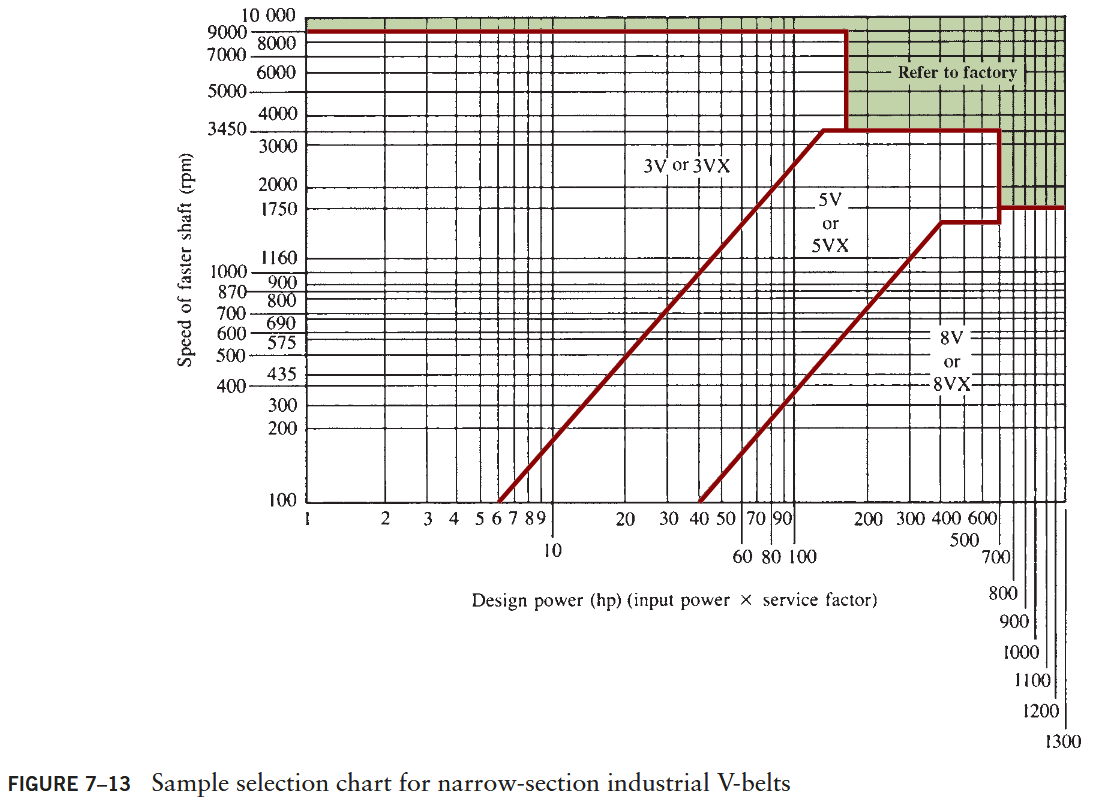

In [6]:
# Fig 7-13: Design power=6.5, faster speed=1750rpm
type = "3V(X)"

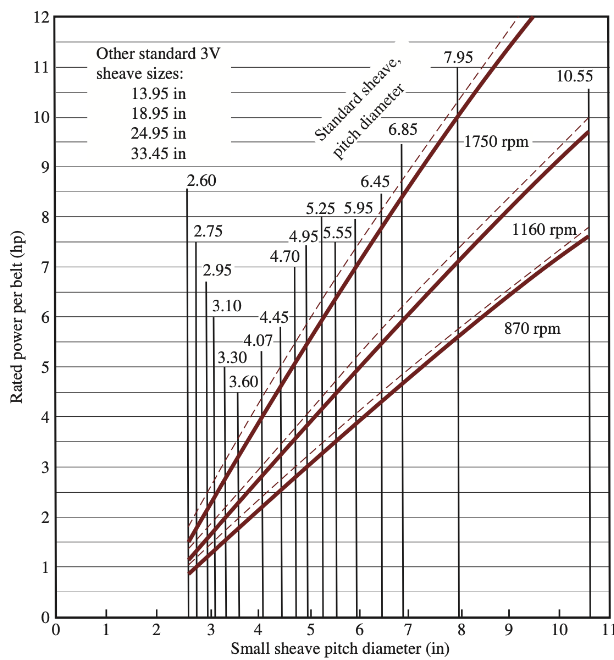
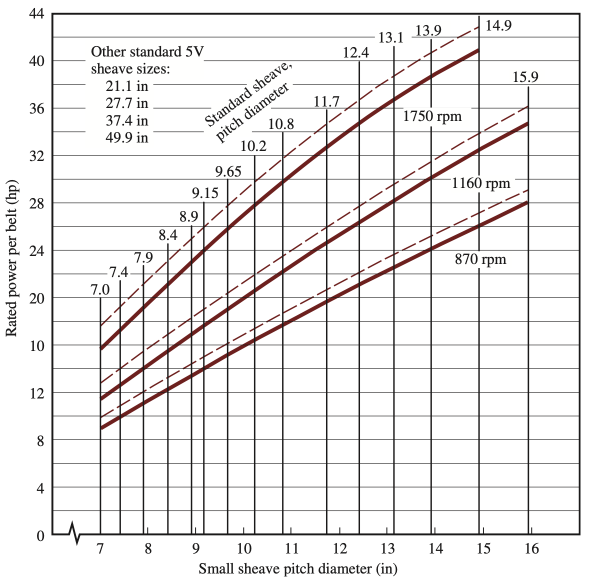
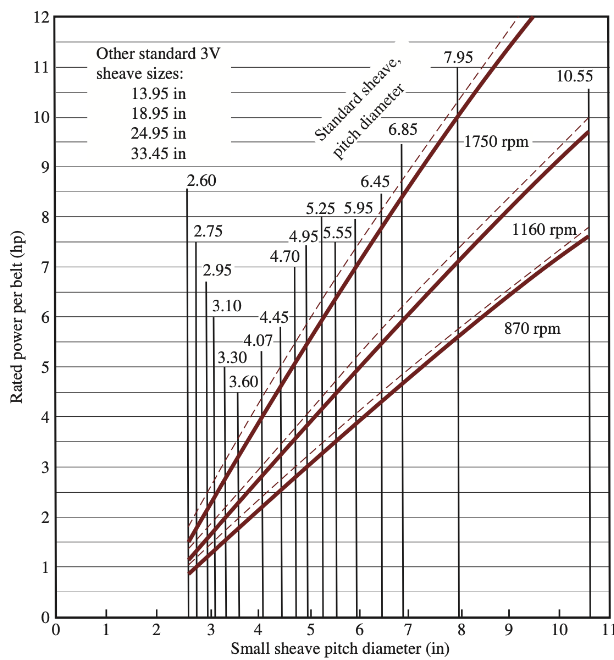

In [20]:
import numpy as np
# Select diameter around 4000ft/min (at least above 1000ft/min)
# 7.95 doesn't give a close enough ratio, so let's try 5.55 / 13.95 to get a better ratio
D_1 = 5.55

v_b = (2 * np.pi * (D_1 / 2)) * n_1 / 12 # ft/min, assuming [D_1]=in, [n_1]=rpm
print(v_b)

2542.7265539992386


In [19]:
# closest D_2 to get VR_actual of 2.5 (VR_nom)
D_2_ideal = VR_nom * D_1
print(D_2_ideal)

13.875


In [21]:
D_2 = 13.95

VR_actual = D_2 / D_1
print(VR_actual)

2.5135135135135136


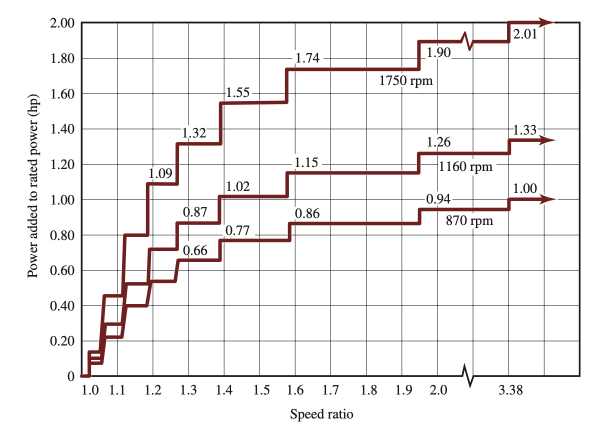

In [23]:
# See tables above for P_rated

P_added = 1.90 # hp
P_rated = 6.25 + P_added
print(P_rated)

8.15


Center Distance

In [27]:
CD_min = D_2
CD_max = 3 * (D_2 + D_1)
print(CD_min, CD_max)

13.95 58.5


In [28]:
CD_est = 20

L_est = 2 * CD_est + np.pi/2 * (D_1 + D_2) + (D_2 - D_1)**2 / (4 * CD_est)
print(L_est)

71.51252837250048


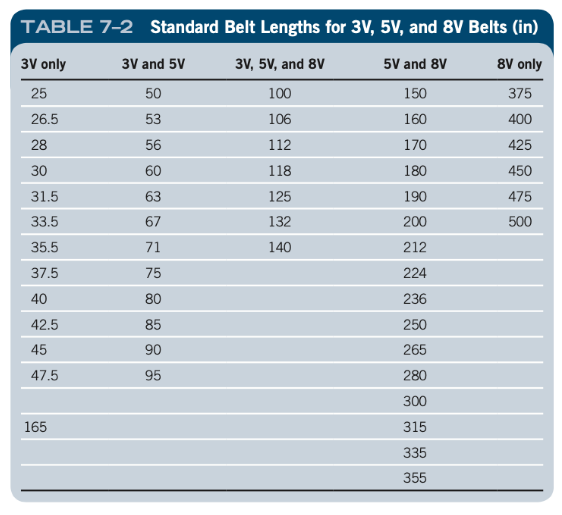

In [29]:
# Let's select a 71' belt

L = 71

B = 4 * L - 2 * np.pi * (D_1 + D_2)
CD = (B + np.sqrt(B**2 - 32*(D_2 + D_1)**2)) / 16
print(CD)

17.462892987743817


In [30]:
# Wrap angles

theta_1_rad = np.pi - 2 * np.asin((D_2 - D_1) / (2 * CD))
theta_2_rad = np.pi + 2 * np.asin((D_2 - D_1) / (2 * CD))

theta_1 = np.degrees(theta_1_rad)
theta_2 = np.degrees(theta_2_rad)

print(theta_1, theta_2)

152.1667168129275 207.8332831870725


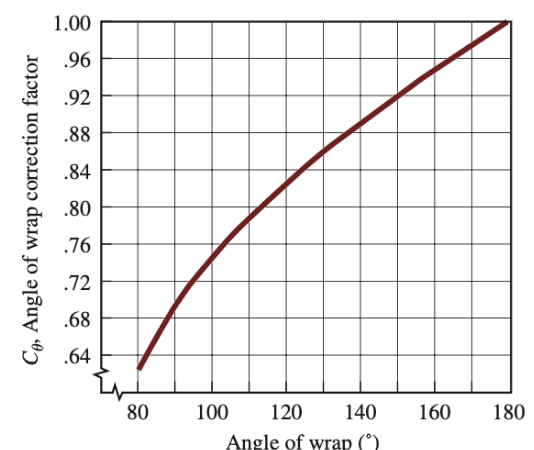

In [31]:
C_theta = 0.92

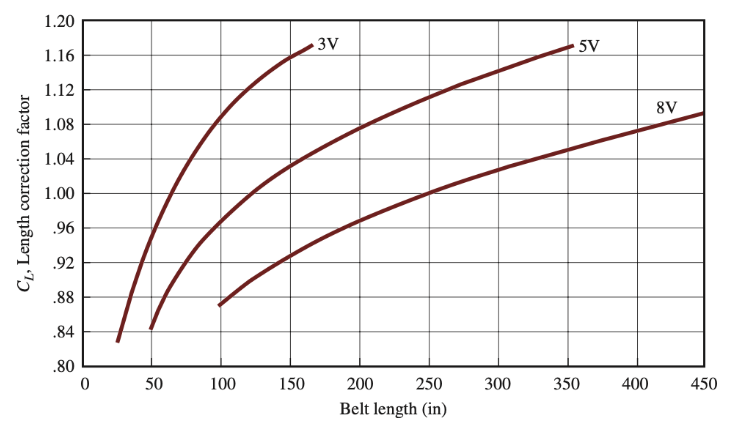

In [32]:
C_L = 1.02

In [33]:
P_corr =  C_theta * C_L * P_rated
print(P_corr)

7.64796


In [34]:
min_belts = np.ceil(H_in / P_corr)
print(min_belts)

1.0


In [35]:
print(f"Belt type: {type}")
print(f"Number of belts: {min_belts:.0f}")
print(f"Sheave sizes: {D_1=}, {D_2=}")
print(f"Actual speed ratio: {VR_actual:.3f}")
print(f"Center line distance: {CD:.3f}")

Belt type: 3V(X)
Number of belts: 1
Sheave sizes: D_1=5.55, D_2=13.95
Actual speed ratio: 2.514
Center line distance: 17.463
